In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(values_list, labels, description, identified=False):
    """
    values_list: list of lists, each sublist is values for one model
    labels: list of labels for each violin (e.g., ['GNN', 'CNN', 'GAT'])
    description: plot title
    """

    y_lim = 1 if identified else 0.01
    std_lim = 1.5 if identified else 0.0125

    # Compute per-group standard deviations
    std_devs = [np.std(group) for group in values_list]

    plt.figure(figsize=(6, 4), constrained_layout=True)
    parts = plt.violinplot(values_list, showmeans=True, showmedians=False, showextrema=False)

    means = [np.mean(group) for group in values_list]

    # Color customization
    for pc in parts['bodies']:
        pc.set_facecolor('skyblue')
        pc.set_alpha(0.7)

    # Set x-ticks
    positions = np.arange(1, len(labels) + 1)
    plt.errorbar(positions, means, yerr=std_devs, fmt='o', color='blue', capsize=5, label='Mean ± STD')
    plt.xticks(ticks=positions, labels=labels)

    max_y = max(max(group) for group in values_list)
    min_y = min(min(group) for group in values_list)

    plt.ylim(min_y - y_lim, max_y + y_lim)

    # Annotate each violin with its std deviation
    for i, std in enumerate(std_devs):
        plt.text(positions[i], max_y + std_lim, f"σ = {std:.4f}", ha='center', fontsize=9, color='black')

    # Draw global mean line (optional)
    all_values = [v for group in values_list for v in group]
    plt.axhline(np.mean(all_values), color='green', linestyle='--', label='Global Mean')

    plt.title(f"{description}", y=1.05)
    plt.xlabel("Model")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



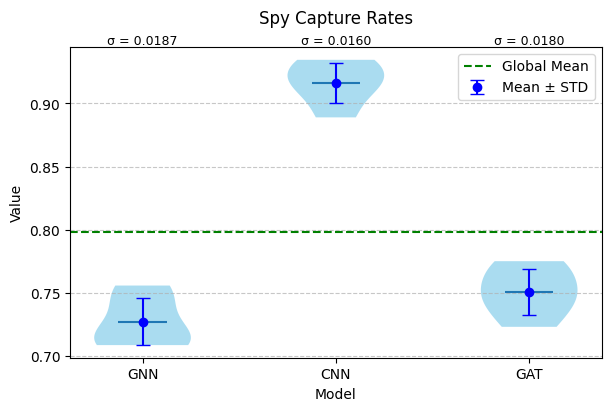

In [2]:
# Example values
gnn_spy_values = [0.715094, 0.755703, 0.742906, 0.708514, 0.71342]
cnn_spy_values = [0.912832, 0.915664, 0.934532, 0.888939, 0.929763]
gat_spy_values = [0.748, 0.743, 0.775, 0.723, 0.765]

plot_graph(
    values_list=[gnn_spy_values, cnn_spy_values, gat_spy_values],
    labels=["GNN", "CNN", "GAT"],
    description="Spy Capture Rates"
)

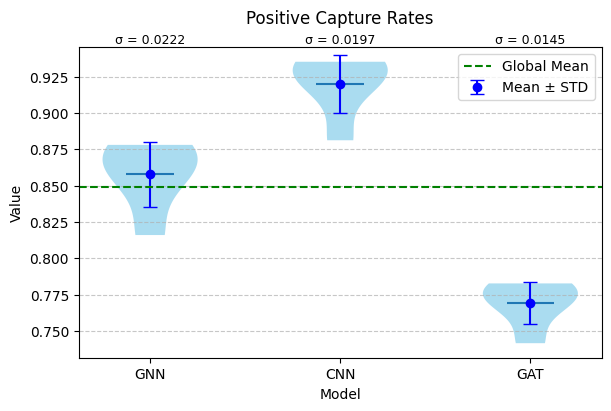

In [3]:
# Example values
gnn_pos_values = [0.878, 0.875, 0.816, 0.858, 0.862]
cnn_pos_values = [0.925918, 0.924017, 0.881174, 0.935166, 0.932593]
gat_pos_values = [0.768068, 0.774218, 0.741647, 0.778447, 0.782745]

plot_graph(
    values_list=[gnn_pos_values, cnn_pos_values, gat_pos_values],
    labels=["GNN", "CNN", "GAT"],
    description="Positive Capture Rates"
)

In [4]:
print(np.std(gnn_pos_values))
print(np.mean(gnn_pos_values))
print(np.mean(gnn_pos_values) - np.std(gnn_pos_values))

0.022220711059729857
0.8577999999999999
0.83557928894027


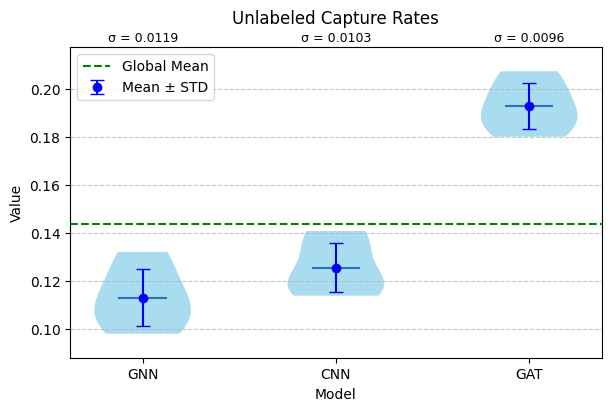

In [5]:
# Example values
gnn_unl_values = [0.11, 0.132, 0.12, 0.098, 0.105]
cnn_unl_values = [0.119545, 0.134503, 0.118962, 0.113826, 0.140743]
gat_unl_values = [0.190338, 0.207194, 0.186289, 0.179911, 0.199142]

plot_graph(
    values_list=[gnn_unl_values, cnn_unl_values, gat_unl_values],
    labels=["GNN", "CNN", "GAT"],
    description="Unlabeled Capture Rates"
)

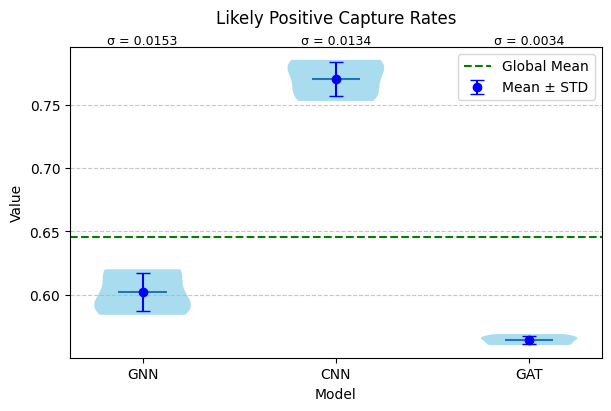

In [6]:
# Example values
gnn_lp_values = [0.62, 0.62, 0.584, 0.597, 0.589]
cnn_lp_values = [0.784487, 0.753133, 0.785614, 0.757647, 0.772665]
gat_lp_values = [0.560117, 0.565672, 0.568792, 0.560079, 0.565433]

plot_graph(
    values_list=[gnn_lp_values, cnn_lp_values, gat_lp_values],
    labels=["GNN", "CNN", "GAT"],
    description="Likely Positive Capture Rates"
)

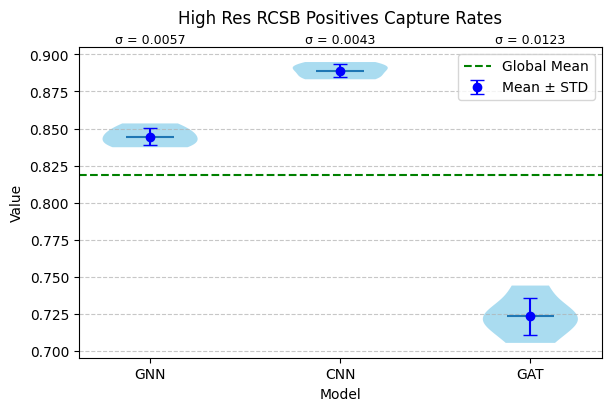

In [7]:
# Example values
gnn_ivan_values = [0.837389, 0.853447, 0.839695, 0.844723, 0.847836]
cnn_ivan_values = [0.894866, 0.891627, 0.885024, 0.883231, 0.890179]
gat_ivan_values = [0.720495, 0.744070, 0.723145, 0.705387, 0.723600]

plot_graph(
    values_list=[gnn_ivan_values, cnn_ivan_values, gat_ivan_values],
    labels=["GNN", "CNN", "GAT"],
    description="High Res RCSB Positives Capture Rates"
)

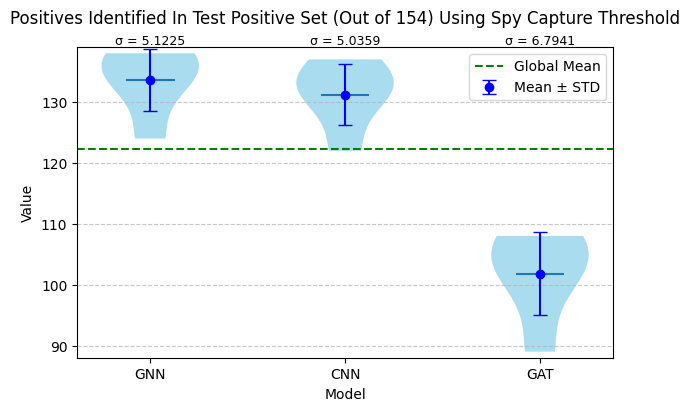

In [8]:
# Example values
gnn_pit_values = [138, 138, 124, 134, 134]
cnn_pit_values = [132, 134, 122, 137, 131]
gat_pit_values = [103, 107, 89, 108, 102]

plot_graph(
    values_list=[gnn_pit_values, cnn_pit_values, gat_pit_values],
    labels=["GNN", "CNN", "GAT"],
    description="Positives Identified In Test Positive Set (Out of 154) Using Spy Capture Threshold",
    identified=True
)

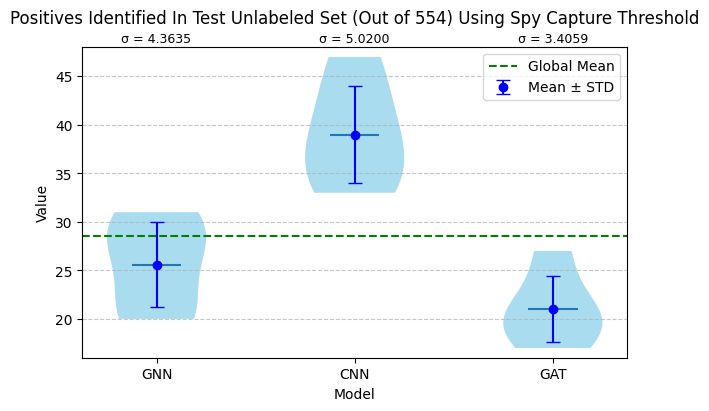

In [9]:
# Example values
gnn_piu_values = [27, 29, 31, 21, 20]
cnn_piu_values = [33, 42, 35, 38, 47]
gat_piu_values = [20, 27, 17, 19, 22]

plot_graph(
    values_list=[gnn_piu_values, cnn_piu_values, gat_piu_values],
    labels=["GNN", "CNN", "GAT"],
    description="Positives Identified In Test Unlabeled Set (Out of 554) Using Spy Capture Threshold",
    identified=True
)

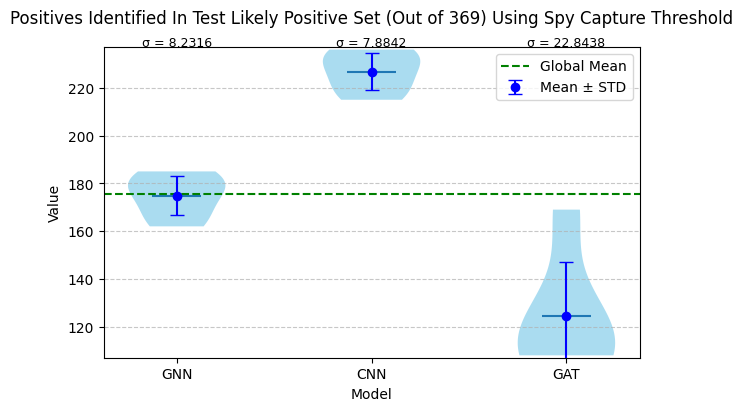

In [10]:
# Example values
gnn_pil_values = [185, 169, 162, 180, 178]
cnn_pil_values = [234, 215, 228, 236, 221]
gat_pil_values = [122, 169, 109, 114, 108]

plot_graph(
    values_list=[gnn_pil_values, cnn_pil_values, gat_pil_values],
    labels=["GNN", "CNN", "GAT"],
    description="Positives Identified In Test Likely Positive Set (Out of 369) Using Spy Capture Threshold",
    identified=True
)